# PyTorch Computer Vision

## 0.Computer vision libraries in PyTorch

* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for you own problems
* `torchvision.transforms`- functions for manipulating your vision data (images) to be suitable for use with an ML model (turn image data into numbers)
* `torch.utils.data.Datasets` - Base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [ ]:
# Import PyTorch
import torch
from torch import nn

# Import torch vision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check version
print(torch.__version__)
print(torchvision.__version__)

2.5.1+cu124
0.20.1+cu124


## 1.Getting a dataset

The dataset we'll be using is FashionMNIST from torchvision.datasets.


In [ ]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # do we wnat training dataset?
    download=True, # do we want to download?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data
    target_transform=None # how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform = ToTensor(),
    target_transform=None
)


In [ ]:
len(train_data),len(test_data)

(60000, 10000)

In [ ]:
# See the first training exampl
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_index = train_data.class_to_idx
class_to_index

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channel,height,width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channel,height,width]
Image label: Ankle boot


## 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


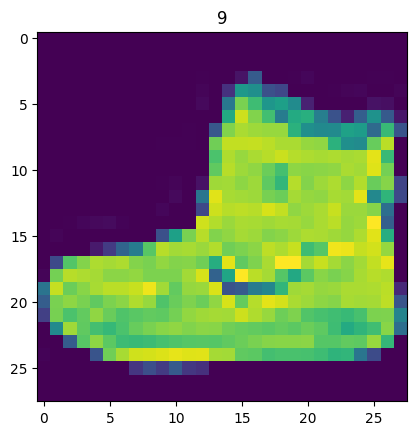

In [ ]:
import matplotlib.pyplot as plt
image,label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze());
plt.title(label);

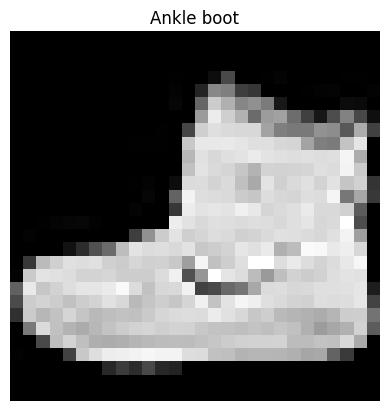

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

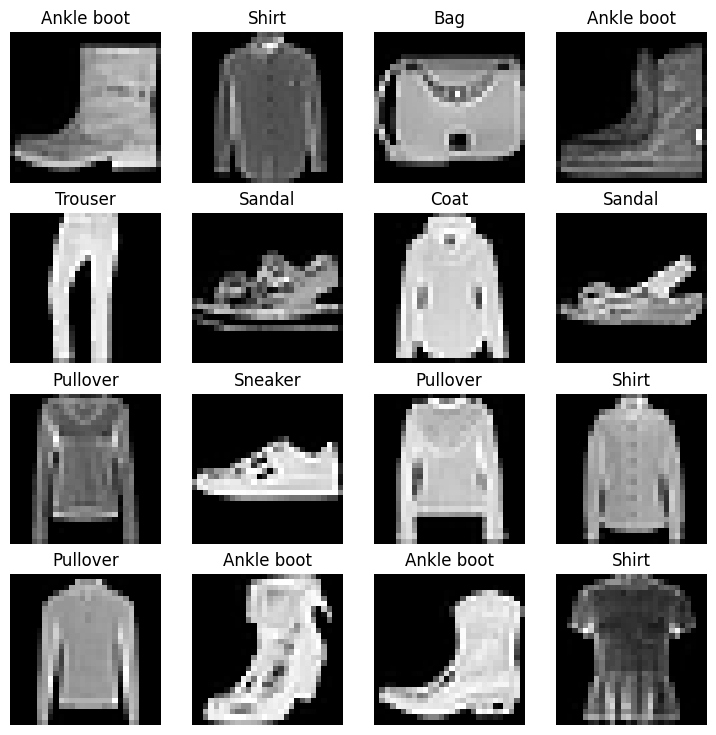

In [ ]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows,cols = 4,4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [ ]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iteralble.

More specifically, we want to turn our data into batches (or mini-batches).

Why?
1. It is more computationally effocoemt, as in your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to sets of images at a time (batch size)
2. It gives our neural networks more chances to update it's gradient per epoch.

In [ ]:
from torch.utils.data import DataLoader

# setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)
test_dataloader = DataLoader(dataset = test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f7b38c5d190>,
 <torch.utils.data.dataloader.DataLoader at 0x7f7b38ac9b50>)

In [ ]:
# Let's check out what we've created
print(f"DatalLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DatalLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f7b38c5d190>, <torch.utils.data.dataloader.DataLoader object at 0x7f7b38ac9b50>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [ ]:
train_features_batch,train_labels_batch = next(iter(train_dataloader)) #iter- iterable, get next iterable
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


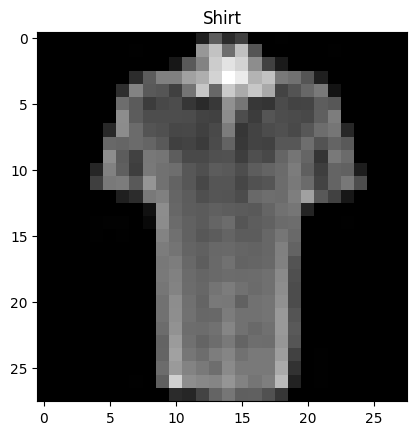

In [ ]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img,label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axes=False
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and imporve upon with subsequent models/experiments.

In other words: start simply and add complexit when necessary

In [ ]:
# Creating a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channel,height,width]")
print(f"Shape after flattening: {output.shape} -> [color_channel, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channel,height,width]
Shape after flattening: torch.Size([1, 784]) -> [color_channel, height*width]


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, #28*28
    hidden_units = 10,
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss functon - since we're working with multi-class data, our loss fucntion will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SDG()` (Stochastic gradient descent)
* Evaluation metric - since we're working on a clssification porblem, let's use accuracy as our evaluation metric

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py","wb") as f: # wb -> write binary
    f.write(request.content)

helper_functions.py already exists, skipping download...


In [ ]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a function to time our experiments

Machine learning is very experiental.

Two of the main thing you'll often want to track are:
1. Model's performance (loss and accuracy values, etc)
2. How fast it runs

In [ ]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device: torch.device=None):
  """
  Prints difference between start and end time.
  """
  total_time = end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
# example
start_time = timer()
# some code..
end_time = timer()
print_train_time(start=start_time,
                 end=end_time,
                 device='cpu')

Train time on cpu: 0.000 seconds


3.949200004171871e-05

### 3.3 Creating a training loop and training a model on batchs of data

1. Loop through epochs.
2. Loop through training batchs, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batch, perform testing steps, calculate test loss *per batch*.
4. Print out what's happening
5. Time it all

In [ ]:
# %%time
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Setup number of epochs (we'll keep it small for faster training time)
epochs = 3

# creating training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")

  ### Training
  train_loss = 0

  # Add a loop, to loop through the training batches
  for batch, (x,y) in enumerate(train_dataloader):
      model_0.train()

      # Forward pass
      y_pred = model_0(x)

      # Calculte the loss
      loss = loss_fn(y_pred,y)
      train_loss += loss # accumulate train loss

      # Optimizer zero grad
      optimizer.zero_grad()

      # Loss backward
      loss.backward()

      # optimizer step
      optimizer.step()

      # Print out what's happening
      if batch % 400 == 0:
        print(f"Looked at {batch*len(x)} / {len(train_dataloader.dataset)} samples.")

  # Divide total training loss by length of train dataloader
  train_loss /= len(train_dataloader)


  ### Testing
  test_loss,test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for x_test,y_test in test_dataloader:

      # Forward pass
      test_pred = model_0(x_test)

      # Calculate the loss (accumultively)
      test_loss += loss_fn(test_pred,y_test)

      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1))
    # Calculate the test loss avg per batch
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  # Print out whats happening
  print(f"\nTrain loss: {train_loss:.4f} | Test_loss: {test_loss:.4f}, Test_acc: {test_acc:.4f}")

# Calculate the training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train loss: 0.5904 | Test_loss: 0.5095, Test_acc: 82.0387
Epoch: 1
-----
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train loss: 0.4763 | Test_loss: 0.4799, Test_acc: 83.1969
Epoch: 2
-----
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train loss: 0.4550 | Test_loss: 0.4766, Test_acc: 83.4265
Train time on cpu: 25.732 seconds


## 4. Make predictions and get model 0 results

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """
  Returns a dictionary containing the results of model prediction on data_loader.
  """
  loss, acc=0,0
  model.eval()
  with torch.inference_mode():
    for x,y in tqdm(data_loader):

      # Make predictions
      y_pred = model(x)

      # Accumulatr the loss and accuracy values per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Scale the loss and acc to find the avg loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,  # only works when model was created with a class
          "model_loss":loss.item(),
          "model_acc": acc}

# calculate model 0 results on test data
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic-code (for using a GPU if available)

In [ ]:
# Setup device-agnostic code

import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6: Model 1: Building a better model with non-linearity

We learned about non-linearity in notebook -> 2


In [ ]:
# Creating a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten inputs into a single vector
        nn.Linear(in_features=input_shape,
                  out_features=output_shape),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self,x : torch.Tensor):
    return self.layer_stack(x)


In [ ]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # this is the output of flatten after our 28*28 image goes in
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 Setup loss, optimizer and evaluation metrics

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### 6.2 Functionizing training and evaluation/testing loop
Let's create a function for:
* training loop - `traing_step()`
* testing loop - `test_step()`

In [ ]:
def train_step(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """
  Performs a training step with model trying to learn on data_loader:
  """
  train_loss,train_acc = 0,0
  # Put model into training mode
  model.train()

  # Add a loop, to loop through the training batches
  for batch, (x,y) in enumerate(data_loader):

    # Put data on target_device
    x,y = x.to(device), y.to(device)

    # Forward pass
    y_pred = model(x)

    # Calculte the loss
    loss = loss_fn(y_pred,y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))


    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # optimizer step
    optimizer.step()

  # Divide total training loss by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f" Train loss: {train_loss:.5f} | Train_acc: {train_acc:.2f}% ")


In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn :torch.nn.Module,
              accuracy_fn,
              device:torch.device = device):
  """
  Performs a testing loop step on model going over data_loader
  """

  test_loss, test_acc = 0,0
  # Put model in eval mode
  model.eval()

  # Turn on inference mode context manager
  with torch.inference_mode():
    for x,y in data_loader:

      # Send data to target device
      x,y = x.to(device), y.to(device)

      # Forward pass
      test_pred = model(x)

      # Calculate the loss/acc
      test_loss += loss_fn(test_pred,y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred= test_pred.argmax(dim=1)) # go from logits -> prediction labels
    # Adjusts metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    print(f"Test loss: {test_loss:.5f} | Test_acc {test_acc:.2f}%\n")

In [ ]:
%%time
torch.manual_seed(42)

device = "cuda" if torch.cuda.is_available() else "cpu"
# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Creeate and optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------------------------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn= accuracy_fn,
             device = device)

  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device = device)

  train_time_end_on_gpu = timer()
  total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                              end=train_time_end_on_gpu,
                                              device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------------------------
 Train loss: 1.09199 | Train_acc: 61.34% 
Test loss: 0.95636 | Test_acc 65.00%

Train time on cuda: 10.838 seconds
Epoch: 1
------------------------
 Train loss: 0.78101 | Train_acc: 71.93% 
Test loss: 0.72227 | Test_acc 73.91%

Train time on cuda: 20.965 seconds
Epoch: 2
------------------------
 Train loss: 0.67027 | Train_acc: 75.94% 
Test loss: 0.68500 | Test_acc 75.02%

Train time on cuda: 32.392 seconds
CPU times: user 27.7 s, sys: 221 ms, total: 28 s
Wall time: 32.4 s


Read -> Making deep learning go brrr from first principles


In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
total_train_time_model_1

32.39171113800012

In [ ]:
# # Get model_1 results dictionary
# model_1_results = eval_model(model=model_1,
#                              data_loader=test_dataloader,
#                              loss_fn = loss_fn,
#                              accuracy_fn = accuracy_fn)
# model_1_results

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """
  Returns a dictionary containing the results of model prediction on data_loader.
  """
  loss, acc=0,0
  model.eval()
  with torch.inference_mode():
    for x,y in tqdm(data_loader):

      # device agnostic
      x,y = x.to(device), y.to(device)

      # Make predictions
      y_pred = model(x)

      # Accumulatr the loss and accuracy values per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Scale the loss and acc to find the avg loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,  # only works when model was created with a class
          "model_loss":loss.item(),
          "model_acc": acc}

In [ ]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also known as ConvoNets.

CNN's are known for their capabilities to find patterns in visual data

-> **https://poloclub.github.io/cnn-explainer/**

In [ ]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG model from CNN explainer website.
  """
  def __init__(self,input_shape: int,hidden_units:int, output_shape:int):
    super().__init__()
    # Create a conv layer
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units * 7 * 7,  # There's a trick to calculating this...
                  out_features=output_shape)
    )

  def forward(self,x):
    x = self.conv_block_1(x)
    # print(f"Output shape of conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Output shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    # print(f"Output shape of classifier: {x.shape}")
    return x


In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [ ]:
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
10*49

490

In [ ]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

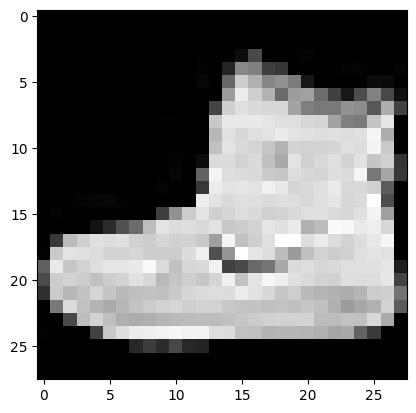

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")

### 7.1 Stepping through `nn.Conv2d()`


In [ ]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(32,3,64,64)
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,  #(3,3)
                       padding=1,
                       stride=1)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

### 7.2 Stepping through `nn.MaxPool2d()`

In [ ]:
# Print out original image shape
print(f"Test image shape: {test_image.shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image)
print(f"Shape after going through conv_layer: {test_image_through_conv.shape}")

# Pass through max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer and max_pool_layer: {test_image_through_conv_and_max_pool.shape}")

Test image shape: torch.Size([3, 64, 64])
Shape after going through conv_layer: torch.Size([10, 64, 64])
Shape after going through conv_layer and max_pool_layer: torch.Size([10, 32, 32])


In [ ]:
torch.manual_seed(42)

# Create a random tensor with a serial number of dimensions to our images
random_tensor = torch.randn(1,1,2,2)
print(f"\nRandom tensor: \n {random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")
# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor: \n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")


Random tensor: 
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor: 
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss function and optimizer for `model_2`

In [ ]:
# Setup a loss functions and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

###7.4 Training and testing `model_2` using our training and test functions

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epoch = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device
             )
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
  train_time_end_model_2 = timer()

  total_tain_time_model_2 = print_train_time(start=train_time_start_model_2,
                                             end=train_time_end_model_2,
                                             device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
 Train loss: 0.59445 | Train_acc: 78.37% 
Test loss: 0.39339 | Test_acc 85.94%

Train time on cuda: 11.565 seconds
Epoch: 1
-------
 Train loss: 0.35968 | Train_acc: 87.01% 
Test loss: 0.34767 | Test_acc 87.14%

Train time on cuda: 23.064 seconds
Epoch: 2
-------
 Train loss: 0.32196 | Train_acc: 88.35% 
Test loss: 0.32014 | Test_acc 88.35%

Train time on cuda: 34.615 seconds


In [ ]:
# Get model_2 results
model_2_results = eval_model(
    model = model_2,
    data_loader = test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3201400637626648,
 'model_acc': 88.34864217252397}

## 8. compare model results and training time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.320140,88.348642


In [ ]:
# Sdd training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_tain_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,25.731883
1,FashionMNISTModelV1,0.685001,75.019968,32.391711
2,FashionMNISTModelV2,0.320140,88.348642,34.614765


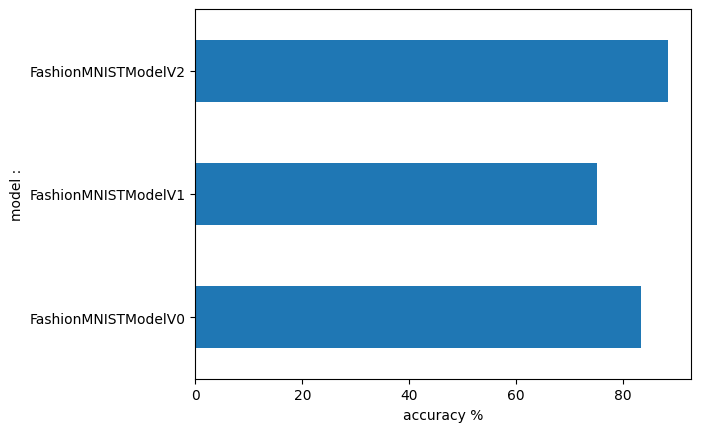

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy %")
plt.ylabel("model :");

## 9. Make and evaluate predictions with best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs_list = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logits = model(sample)

      # Get pred probs (logits -> prediction probability)
      pred_probs = torch.softmax(pred_logits.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculation
      pred_probs_list.append(pred_probs.cpu())

  # Stack the prd_probs to turn list into tensor
  return torch.stack(pred_probs_list)

In [ ]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
import random
random.seed(42)

test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the firs sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

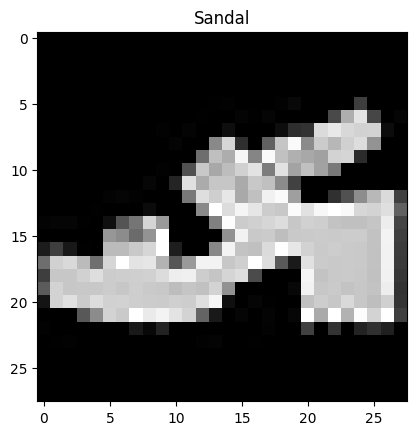

In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# view the first 2 prediction probabilities
pred_probs[:2]

tensor([[5.8645e-08, 1.1486e-08, 2.3445e-07, 1.5321e-08, 4.1158e-08, 9.9979e-01,
         2.6831e-07, 4.4083e-06, 5.6338e-05, 1.4680e-04],
        [5.7177e-02, 6.7617e-01, 4.1818e-03, 1.3131e-01, 3.5656e-02, 1.5922e-04,
         9.4000e-02, 8.7184e-04, 8.2804e-05, 3.8173e-04]])

In [ ]:
# Convert predictions to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 0, 0, 4, 7, 1])

In [ ]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

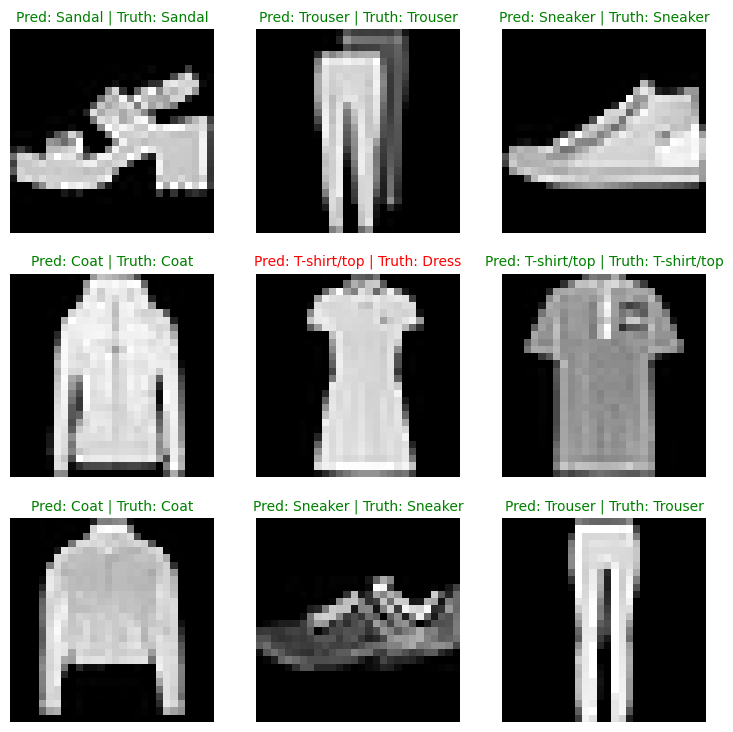

In [ ]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows,ncols,i+1)

  # Plot target image
  plt.imshow(sample.squeeze(),cmap="gray")

  # Find prediction(in text form: eg:"Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label
  truth_label = class_names[test_labels[i]]

  # Create a title
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title test
  if pred_label == truth_label:
    plt.title(title_text,fontsize=10, c="g") # green if pred same as truth

  else:
    plt.title(title_text,fontsize=10, c="r")

  plt.axis(False);

## 10. Making a confusion matrix for further prediction evaluation

A consfusion matrix is a fantastic way of evaluation classification models

1. Make predictions with our trained model on the test dataset
2. Make a confusion matix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`


In [ ]:
import tqdm.auto
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for x,y in tqdm(test_dataloader, desc="Making predictions...."):
    # send the data to device
    x,y = x.to(device), y.to(device)

    # Forward pass
    y_logits = model_2(x)

    # Predictions from logits to labels
    y_pred = torch.softmax(y_logits.squeeze(),dim=0).argmax(dim=1)

    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into tensor
# print(y_preds)
y_preds_tensor = torch.cat(y_preds)
y_preds_tensor

Making predictions....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 2])

In [ ]:
len(y_preds_tensor)

10000

In [ ]:
# !pip install torchmetrics

In [ ]:
# try:
#   import torchmetrics, mlxtend
#   print(f"mlxtend.__version__: {mlxtend.__version__}")
#   print(f"torchmetrics.__version__: {torchmetrics.__version__}")
# except:
#   !pip install torchmetrics mlxtend
#   import torchmetrics,mlxtend

In [ ]:
import torchmetrics
torchmetrics.__version__

'1.6.2'

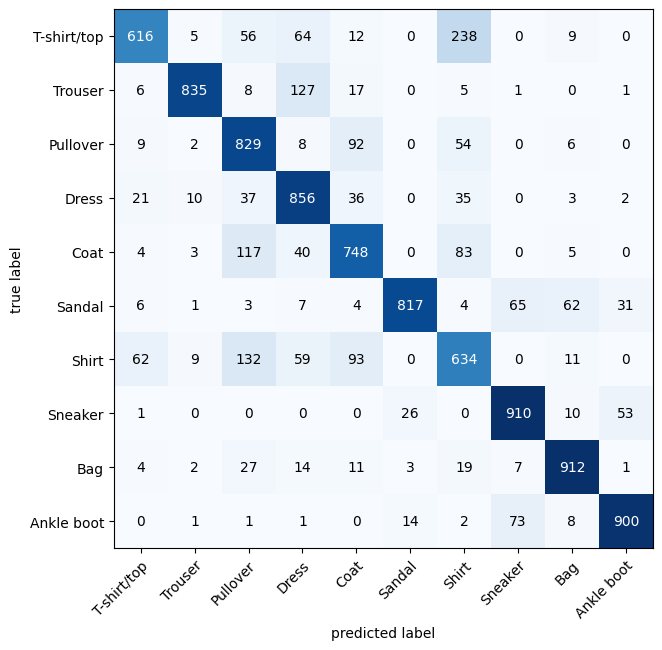

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to target
confmat = ConfusionMatrix(num_classes=len(class_names),task="MULTICLASS")
confmat_tensor = confmat(preds=y_preds_tensor,
                         target=test_data.targets)

# Plot matrix
fig,ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names = class_names,
    figsize=(10,7)
    )

## 11. Save and load best preforming model


In [ ]:
# Saving our pytorch model

from pathlib import Path

# Create models directory
MODEL_PATH = Path("/content/drive/MyDrive/pytorch/models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path

# pth - pytorch extension
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# for saving full model -> torch.save(model,PATH)
# torch.save(MODEL_NAME, MODEL_SAVE_PATH)


# Save the model state_dict()
# State dict -> all the models learned parameters on dataset
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: /content/drive/MyDrive/pytorch/models/03_pytorch_computer_vision_model_2.pth


In [ ]:
# Create a new instance
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to target device
loaded_model_2.to(device)

<ipython-input-305-98404980fe78>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3201400637626648,
 'model_acc': 88.34864217252397}

In [ ]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model = loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3201400637626648,
 'model_acc': 88.34864217252397}

In [ ]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02) # absolute tolerance (results same upto 2 decimal places)

tensor(True)